### Exploratory Data Analysis - Crime Detection in Social Media messages

#### Links:
https://www.kaggle.com/c/utkmls-twitter-spam-detection-competition
https://www.kaggle.com/datasets/mrmorj/hate-speech-and-offensive-language-dataset

#### Loading the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
spam_data = pd.read_csv('./data/spam_detection.csv', index_col='id')
spam_data

,count,hate_speech,offensive_language,neither,class,tweet
id,,,,,,
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...
25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...


In [3]:
crime_data = pd.read_csv('./data/crime_analysis.csv')
crime_data.drop(columns=["Unnamed: 7"], axis=1, inplace=True)
crime_data

,Tweet,following,followers,actions,is_retweet,location,Type
0,Good Morning Love @LeeBrown_V,0.0,0.0,0.0,0.0,"Pennsylvania, USA",Quality
1,'@realDonaldTrump @USNavy RIP TO HEROES',42096.0,61060.0,5001.0,0.0,"South Padre Island, Texas",Spam
2,Haven't been following the news but I understa...,0.0,0.0,NaN,0.0,Will never be broke ever again,Quality
3,pic.twitter.com/dy9q4ftLhZ What to do with pap...,0.0,0.0,0.0,0.0,Mundo,Quality
4,#DidYouKnow ► Mahatma Gandhi made a brief visi...,17800.0,35100.0,NaN,0.0,"Nottingham, England",Quality
...,...,...,...,...,...,...,...
14894,"#AllWentWrongWhen I told my hair stylist to ""g...",695.0,533.0,868.0,1.0,United States,Spam
14895,"They don't have to like you, and you don't hav...",0.0,0.0,0.0,0.0,NaN,Quality
14896,#Miami Graham Nash Live at Parker Playhouse #...,5647.0,15091.0,5823.0,0.0,United States,Spam
14897,@bethannhamilton is in the business of one-upp...,0.0,0.0,NaN,0.0,"Southgate, MI",Quality


#### Data Description - Crime Data

- tweet: This is the text that was tweeted

- following: The number of people the account that tweeted is following

- followers: The number of people following the account that tweeted

- actions: The total number of favorites, replies, and retweets of said tweet

- is_retweet: Binary value: If 0 its not a retweet, if 1 it is a retweet

- location: The self-written location provided by the user on their profile, May not exist, be "Unkown", and is NOT standardized! ex. could be ("NY", "New York", "Upper East Side", Etc!)

- type: Either Quality or Spam

In [4]:
crime_data.shape

(14899, 7)

In [5]:
crime_data.describe()

,following,followers,actions,is_retweet
count,1.474100e+04,1.488200e+04,11462.000000,14898.000000
mean,4.696292e+03,3.534459e+05,6991.949311,0.249765
std,3.189653e+04,3.890453e+06,15803.881463,0.432892
min,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,0.000000e+00,0.000000e+00,13.000000,0.000000
50%,7.400000e+01,8.030000e+02,1495.500000,0.000000
75%,3.025000e+03,1.304975e+04,6692.500000,0.000000
max,1.600000e+06,1.050000e+08,165599.000000,1.000000


In [6]:
crime_data.isna().sum()

Tweet            0
following      158
followers       17
actions       3437
is_retweet       1
location      2011
Type             0
dtype: int64

In [7]:
crime_data.dropna(inplace=True)

In [8]:
crime_data.nunique()

Tweet         10258
following      4464
followers      5013
actions        6025
is_retweet        2
location       2875
Type              3
dtype: int64

In [9]:
crime_data['Type'].unique()

array(['Quality', 'Spam', 'South Dakota'], dtype=object)

In [10]:
crime_data[crime_data['Type'] == 'South Dakota']

,Tweet,following,followers,actions,is_retweet,location,Type
12843,TRAITOR California Republicans are Defying Tru...,0.0,2.0,412.0,0.0,South Carolina,South Dakota


In [11]:
crime_data.drop(crime_data[crime_data['Type'] == 'South Dakota'].index,inplace=True)

In [12]:
crime_data[crime_data['Type'] == 'South Dakota']

,Tweet,following,followers,actions,is_retweet,location,Type


In [13]:
crime_data.nunique()

Tweet         10257
following      4464
followers      5013
actions        6024
is_retweet        2
location       2874
Type              2
dtype: int64

In [14]:
crime_data['location'].unique()

array(['Pennsylvania, USA', 'South Padre Island, Texas', 'Mundo', ...,
       'Jersey', 'Warner Bros, Water Tower', 'I(c/r)eland'], dtype=object)

In [15]:
def check_improper_tokens(row):
    valid_chars = "1234567890abcdefghijklmnopqrstuvxyzABCDEFGHIJKLMMNOPQRSTUVWXYZ ,"
    for x in row['location']:
        if x not in valid_chars:
            return True
    return False

In [16]:
crime_data.drop(crime_data[crime_data.apply(check_improper_tokens, axis=1)].index, inplace=True)

In [17]:
crime_data

,Tweet,following,followers,actions,is_retweet,location,Type
0,Good Morning Love @LeeBrown_V,0.0,0.0,0.0,0.0,"Pennsylvania, USA",Quality
1,'@realDonaldTrump @USNavy RIP TO HEROES',42096.0,61060.0,5001.0,0.0,"South Padre Island, Texas",Spam
3,pic.twitter.com/dy9q4ftLhZ What to do with pap...,0.0,0.0,0.0,0.0,Mundo,Quality
5,"#amms Samantha Bee Tries to ATTACK Trump, Inst...",29.0,7.0,389.0,0.0,England,Spam
8,Banking on Brexit: is it time to Invest in the...,530.0,849.0,8288.0,1.0,Kuala Lumpur,Spam
...,...,...,...,...,...,...,...
14892,"Actually, the last national referendum was on ...",0.0,165000.0,268.0,0.0,"Alberta, Canada",Quality
14893,"Kendrys Morales hits walk-off homerun, Royals ...",4529.0,24567.0,35792.0,0.0,United States,Spam
14894,"#AllWentWrongWhen I told my hair stylist to ""g...",695.0,533.0,868.0,1.0,United States,Spam
14896,#Miami Graham Nash Live at Parker Playhouse #...,5647.0,15091.0,5823.0,0.0,United States,Spam


<AxesSubplot: xlabel='Type'>

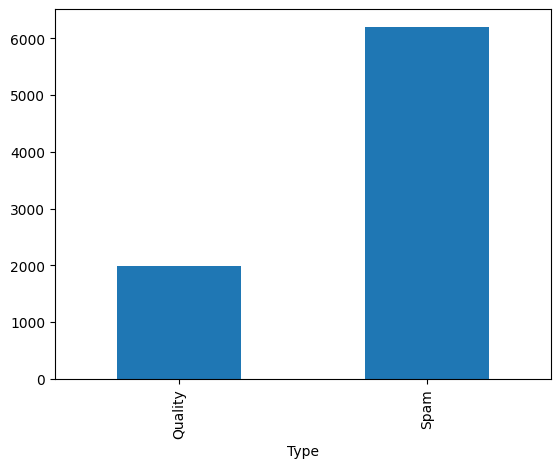

In [18]:
crime_data.groupby('Type')['Type'].count().plot.bar()

<AxesSubplot: xlabel='is_retweet'>

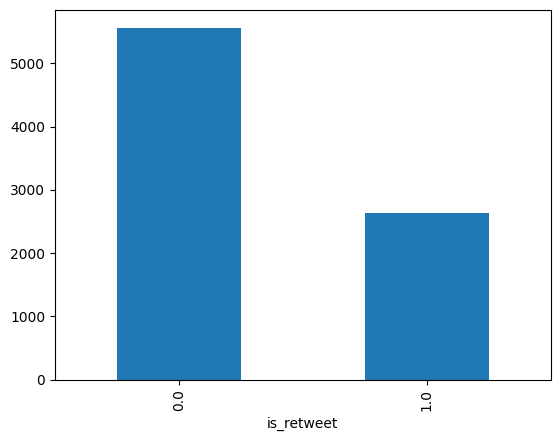

In [19]:
crime_data.groupby('is_retweet')['is_retweet'].count().plot.bar()

#### Data Description - Spam Data

- count: number of CrowdFlower users who coded each tweet (min is 3, sometimes more users coded a tweet when judgments were determined to be unreliable by CF)

- hate_speech: number of CF users who judged the tweet to be hate speech

- offensive_language: number of CF users who judged the tweet to be offensive

- neither: number of CF users who judged the tweet to be neither offensive nor non-offensive

- class: class label for majority of CF users. 0 - hate speech 1 - offensive language 2 - 

- tweet: text tweet


In [24]:
spam_data.sample(5)

,count,hate_speech,offensive_language,neither,class,tweet
id,,,,,,
20712,3,1,2,0,1,RT @urbandictionary: @The2kGod nigger: A fully...
5179,3,0,3,0,1,@TreThreat @HotDoc87 @duckydynamo yeah the int...
13267,3,0,1,2,2,My Twitter app is poo trash.
8510,3,0,2,1,1,"COME TO TND!!!! Atrocities starts at 7, follow..."
8431,3,0,3,0,1,Bruh I'm ready to get this four wheeler that b...


In [21]:
spam_data.shape

(24783, 6)

In [22]:
spam_data.describe()

,count,hate_speech,offensive_language,neither,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,3.243473,0.280515,2.413711,0.549247,1.110277
std,0.883060,0.631851,1.399459,1.113299,0.462089
min,3.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,2.000000,0.000000,1.000000
50%,3.000000,0.000000,3.000000,0.000000,1.000000
75%,3.000000,0.000000,3.000000,0.000000,1.000000
max,9.000000,7.000000,9.000000,9.000000,2.000000


In [25]:
spam_data.isna().sum()

count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

In [26]:
spam_data.nunique()

count                     5
hate_speech               8
offensive_language       10
neither                  10
class                     3
tweet                 24783
dtype: int64

<AxesSubplot: xlabel='count'>

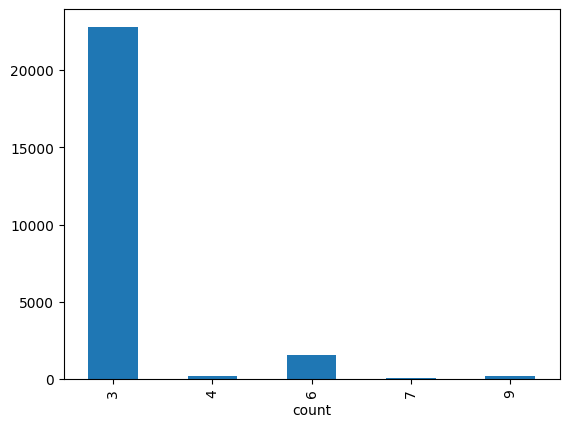

In [27]:
spam_data.groupby('count')['count'].count().plot.bar()

<AxesSubplot: xlabel='hate_speech'>

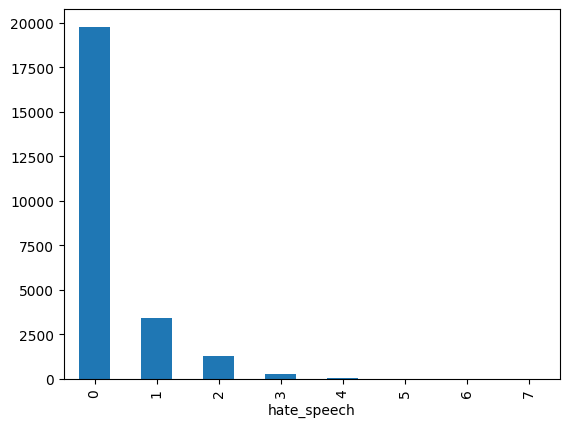

In [29]:
spam_data.groupby('hate_speech')['hate_speech'].count().plot.bar()

<AxesSubplot: xlabel='offensive_language'>

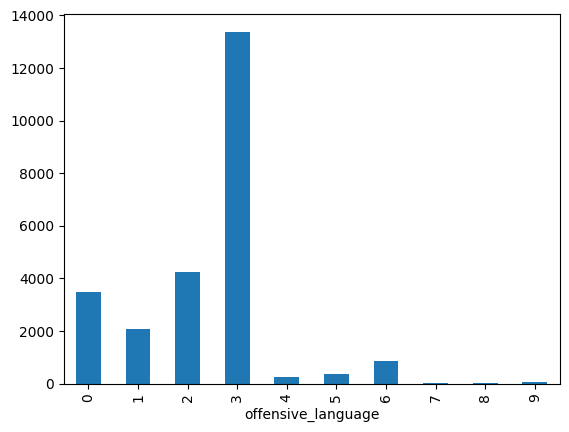

In [30]:
spam_data.groupby('offensive_language')['offensive_language'].count().plot.bar()

<AxesSubplot: xlabel='neither'>

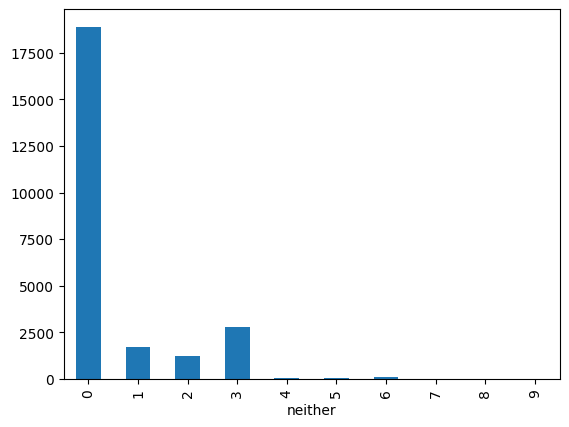

In [32]:
spam_data.groupby('neither')['neither'].count().plot.bar()

<AxesSubplot: xlabel='class'>

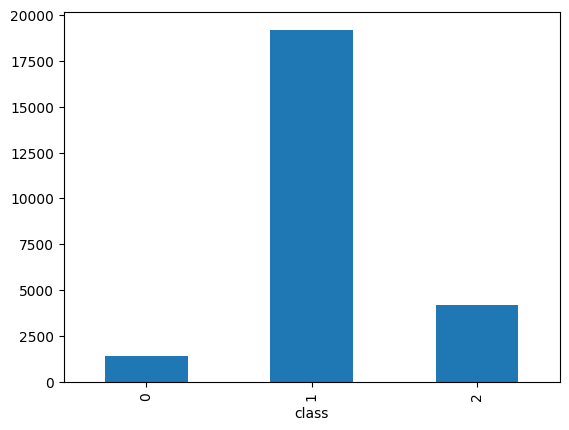

In [33]:
spam_data.groupby('class')['class'].count().plot.bar()